In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import BatchNormalization,Input
from tensorflow.keras.layers import RandomCrop,RandomTranslation,RandomRotation,RandomZoom,RandomContrast #Data augment
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading MNIST

In [6]:
mnist = tf.keras.datasets.mnist #hand written 0-9
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [7]:
print("Train shape: ",X_train.shape)
print("Test shape: ",X_test.shape)

Train shape:  (60000, 28, 28)
Test shape:  (10000, 28, 28)


In [8]:
X_train.dtype

dtype('uint8')

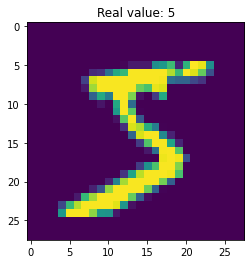

Text(0.5, 1.0, 'Real value: 5')

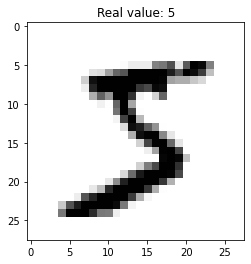

In [9]:
plt.imshow(X_train[0])
plt.title(f"Real value: {y_train[0]}")
plt.show()
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.title(f"Real value: {y_train[0]}")

# Checking value of pixels before Normalize

In [10]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Normalize,Pre-processing

In [11]:
#method 1 (value 0-1)
# X_train = tf.keras.utils.normalize(X_train,axis=1)
# X_test = tf.keras.utils.normalize(X_test,axis=1) #mannual x/255
# plt.imshow(X_train[0],cmap=plt.cm.binary)
# plt.show()

In [12]:
# X_train[0]

In [13]:
import cv2

In [14]:
def to_binary(img_list): #binary and resize
    img_b_list=[]
    
    for img in img_list:        
        (thresh, img_binary) = cv2.threshold(img, 128, 255, 
                                      cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        img = img_binary
        img_b_list.append(img)
        
    return np.array(img_b_list)

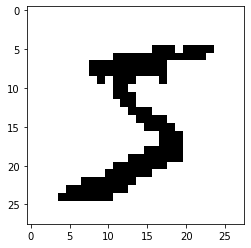

In [15]:
# method 2 (value 0,1)

X_train = to_binary(X_train)
X_test = to_binary(X_test)

plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

In [16]:
X_train = X_train/255
X_test = X_test/255

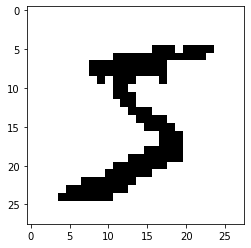

In [17]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

# Resize img to ensure that match to CNN input

In [18]:
IMG_SIZE=28
X_trainr=np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) #increase one dimension for kernal operation
X_testr=np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Trainging sample dimension ",X_trainr.shape)
print("Testing sample dimension ",X_testr.shape)

Trainging sample dimension  (60000, 28, 28, 1)
Testing sample dimension  (10000, 28, 28, 1)


# DATA Augmentation

In [19]:
#bacth Parameter
batch_size = 64

In [20]:
# # With data augmentation to prevent overfitting (set 1)
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.15, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False, # randomly flip images
#         )  


# #datagen.fit(X_train)
# train_gen = datagen.flow(X_trainr, y_train, batch_size=batch_size)
# test_gen = datagen.flow(X_testr, y_test, batch_size=batch_size)


In [46]:
# With data augmentation to prevent overfitting (set 2)
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.5, # Randomly zoom image 
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False, # randomly flip images
        shear_range=0.1, #
        )  


#datagen.fit(X_train)
train_gen = datagen.flow(X_trainr, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_testr, y_test, batch_size=batch_size)


In [47]:
train_gen.x.shape

(60000, 28, 28, 1)

# Visualize ImageGen

In [48]:
train_gen_x_vs,train_gen_y_vs = next(train_gen)

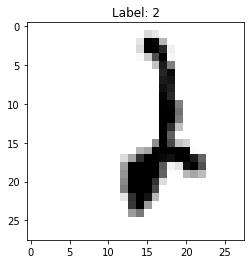

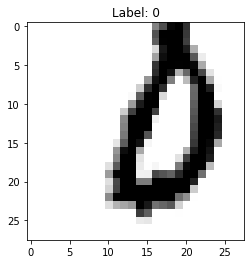

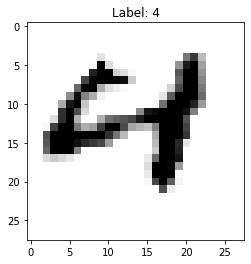

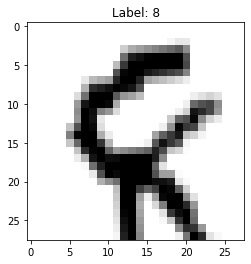

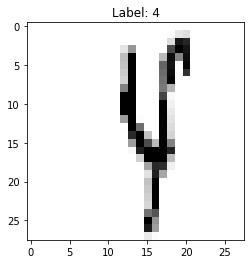

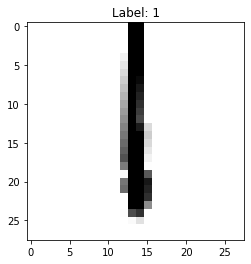

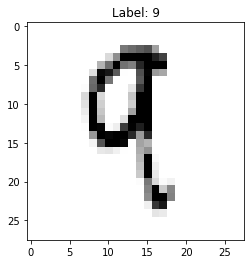

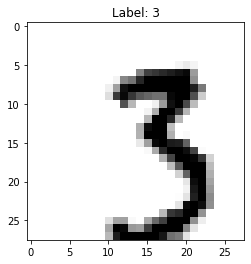

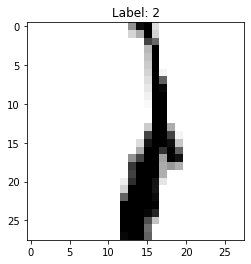

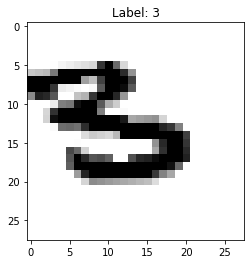

In [49]:
for i in range (0,10):
    image = train_gen_x_vs[i]
    plt.imshow(image,cmap=plt.cm.binary)
    plt.title(f"Label: {train_gen_y_vs[i]}")
    plt.show()

# CNN Model

In [25]:
# #Model 1
# model= Sequential()

# #Input layer
# model.add(Input((28,28,1)))

# #Convolution
# model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())    
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
# model.add(MaxPooling2D(pool_size=(2,2)))

# #MLP    
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(512,activation="relu"))
    
# model.add(Dense(10,activation="softmax"))
    
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# #"categorical_crossentropy" if Y is one hot vecter

In [26]:
# #Model 2
# model= Sequential()

# #Input layer
# model.add(Input((28,28,1)))   

# #Convolution
# model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())    
# model.add(Conv2D(filters=256, kernel_size = (3,3),padding='same', activation="relu"))
    
# model.add(MaxPooling2D(pool_size=(2,2)))

# #MLP    
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(2028,activation="relu"))
    
# model.add(Dense(10,activation="softmax"))
    
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# #Model 3 (Dropout)
# model= Sequential()

# #Input layer
# model.add(Input((28,28,1)))

# #Convolution
# model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))


# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())    
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.1))

# #MLP    
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(512,activation="relu"))
# model.add(Dropout(0.2))

# model.add(Dense(10,activation="softmax"))
    
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# #"categorical_crossentropy" if Y is one hot vecter

In [28]:
# #Model 4
# model= Sequential()

# #Input layer
# model.add(Input((32,32,1)))

# #Convolution
# model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())    
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
# model.add(MaxPooling2D(pool_size=(2,2)))

# #MLP    
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(512,activation="relu"))
# model.add(Dense(1024,activation="relu"))    
# model.add(Dense(10,activation="softmax"))
    
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# #"categorical_crossentropy" if Y is one hot vecter

In [29]:
# model.summary()

In [30]:
# earlystop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [53]:
Model_path = 'saved_model/99-my_model_Bi_AugZ,R_Gen_E70' 
new_Model_path = 'saved_model/99-my_model_Bi_AugZ2,R2_Gen_E70+E100'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=new_Model_path,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Train Model

In [54]:
epochs = 300
tune_eporch = 100

In [33]:
#history = model.fit(X_trainr, y_train, batch_size=batch_size, validation_split=0.2, epochs=epochs,callbacks=[earlystop])

In [34]:
# train with ImageGen
# history = model.fit(train_gen, 
#                               epochs = epochs, 
#                               steps_per_epoch = X_train.shape[0] // batch_size,
#                               validation_data = test_gen,
#                               validation_steps = X_test.shape[0] // batch_size,
#                             callbacks=[model_checkpoint_callback,earlystop]
#                              )

In [55]:
old_model = tf.keras.models.load_model(Model_path)

In [56]:
old_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [57]:
old_model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 64) dtype=float32, numpy=
 array([[[[ 1.41423643e-01,  1.01756006e-01, -1.01788454e-01,
            8.73754360e-03, -3.78696263e-01,  1.15752155e-02,
            3.82470608e-01, -8.59107673e-02, -4.88318540e-02,
            1.17601514e-01,  8.54989216e-02, -2.78094918e-01,
           -2.49373212e-01, -5.58500811e-02, -8.84640291e-02,
            1.12067401e-01, -3.82588506e-02,  3.75098467e-01,
           -7.83235580e-02,  5.19365184e-02, -2.10959077e-01,
           -7.30570257e-02, -2.28798941e-01, -4.63819019e-02,
           -2.15838507e-01, -3.31600487e-01, -8.04012492e-02,
            7.31788063e-03,  7.41027668e-02,  2.26898849e-01,
           -5.96877933e-01, -2.00514607e-02,  5.18276021e-02,
           -3.20655406e-01,  1.61688760e-01,  2.60360867e-01,
           -1.19306751e-01, -2.57299724e-03,  2.67820861e-02,
           -2.54548252e-01,  2.79743187e-02,  7.24144801e-02,
            2.89755911e-02,  3.12534422e-02, -1.74614470e-

In [58]:
#set up for fine-tune dense model

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(old_model.layers))

# # Fine-tune from this layer onwards
fine_tune_at = 13 #13,14 is dense 

# Freeze all the layers before the `fine_tune_at` layer
for layer in old_model.layers[:13]:
  layer.trainable = False


Number of layers in the base model:  14


In [59]:
#train from old model
history = old_model.fit(train_gen, 
                              epochs = tune_eporch, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size,
                            callbacks=[model_checkpoint_callback]
                             )


Epoch 1/100
937/937 [==============================] - 27s 20ms/step - loss: 0.1346 - accuracy: 0.9612 - val_loss: 0.1071 - val_accuracy: 0.9681
Epoch 2/100
937/937 [==============================] - 19s 20ms/step - loss: 0.0932 - accuracy: 0.9718 - val_loss: 0.0823 - val_accuracy: 0.9748
Epoch 3/100
937/937 [==============================] - 19s 20ms/step - loss: 0.0851 - accuracy: 0.9735 - val_loss: 0.0777 - val_accuracy: 0.9773
Epoch 4/100
937/937 [==============================] - 19s 20ms/step - loss: 0.0755 - accuracy: 0.9772 - val_loss: 0.0759 - val_accuracy: 0.9780
Epoch 5/100
937/937 [==============================] - 17s 18ms/step - loss: 0.0713 - accuracy: 0.9782 - val_loss: 0.0753 - val_accuracy: 0.9776
Epoch 6/100
937/937 [==============================] - 19s 20ms/step - loss: 0.0709 - accuracy: 0.9786 - val_loss: 0.0685 - val_accuracy: 0.9788
Epoch 7/100
937/937 [==============================] - 19s 20ms/step - loss: 0.0657 - accuracy: 0.9796 - val_loss: 0.0656 - val_ac

937/937 [==============================] - 18s 19ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0462 - val_accuracy: 0.9854A: 12s - loss: 0.0330 - accura - ETA:  - ETA: 4s - loss: 0.0399 - accuracy - ETA: 4s - loss: 0.0397 - accuracy
Epoch 39/100
937/937 [==============================] - 18s 19ms/step - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0494 - val_accuracy: 0.9847
Epoch 40/100
937/937 [==============================] - 18s 19ms/step - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0572 - val_accuracy: 0.9831
Epoch 41/100
937/937 [==============================] - 18s 19ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.0497 - val_accuracy: 0.9846
Epoch 42/100
937/937 [==============================] - 18s 19ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.0515 - val_accuracy: 0.9840
Epoch 43/100
937/937 [==============================] - 18s 19ms/step - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.0534 - val_accuracy: 0.9847
Epoch 44/100
937/937 [=====

937/937 [==============================] - 18s 19ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0475 - val_accuracy: 0.9863cura - ETA: 0s
Epoch 82/100
937/937 [==============================] - 18s 19ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0487 - val_accuracy: 0.9838
Epoch 83/100
937/937 [==============================] - 17s 19ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0498 - val_accuracy: 0.9858s: 0.0325 - accu
Epoch 84/100
937/937 [==============================] - 17s 19ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0537 - val_accuracy: 0.9844
Epoch 85/100
937/937 [==============================] - 18s 19ms/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0460 - val_accuracy: 0.9859315 - accura - ETA: 5s - loss: 0.0309 - accura - ETA: 5s - loss: 0.030 - ETA: 3s - ETA: 2s - loss: - ETA: 1s - loss: 0.0305 
Epoch 86/100
937/937 [==============================] - 17s 18ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0481 - val_

In [18]:
# model.save('saved_model/99-my_model2_Aug_Gen_E50')

INFO:tensorflow:Assets written to: saved_model/99-my_model2_Aug_Gen_E50\assets


In [63]:
reconstructed_model = tf.keras.models.load_model(new_Model_path)

In [64]:
reconstructed_model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 64) dtype=float32, numpy=
 array([[[[ 4.07201126e-02,  1.71077937e-01,  2.74296343e-01,
           -3.27720821e-01, -4.70885962e-01,  2.21382335e-01,
            3.31921309e-01,  1.01236947e-01,  2.76119169e-02,
            2.94959158e-01,  8.36640969e-02, -3.17221344e-01,
           -5.65687716e-01, -1.37044728e-01, -9.05171186e-02,
            3.23656678e-01, -3.82588506e-02,  7.36468017e-01,
           -1.08445644e-01,  2.26029024e-01, -4.92371500e-01,
           -7.30570257e-02, -1.05140412e+00, -1.16854846e-01,
           -1.38177052e-01, -5.31117618e-01, -8.04012492e-02,
            7.31788063e-03,  7.41027668e-02,  2.36855626e-01,
           -4.52767563e+00, -1.18552990e-01,  5.18276021e-02,
           -4.61808801e-01,  2.87487805e-01,  6.82524681e-01,
            2.06823777e-02, -2.57299724e-03,  2.56119743e-02,
           -3.40084344e-01,  2.17269257e-01,  4.44538929e-02,
            2.15675443e-01,  3.12534422e-02, -1.95372713e+

In [60]:
history.history

{'loss': [0.1346486508846283,
  0.09315196424722672,
  0.08506915718317032,
  0.07549814134836197,
  0.071290522813797,
  0.07090412080287933,
  0.06571502238512039,
  0.059074435383081436,
  0.060586296021938324,
  0.05985591933131218,
  0.059112172573804855,
  0.056070130318403244,
  0.05479973554611206,
  0.05503994971513748,
  0.05323813483119011,
  0.05484230816364288,
  0.05090178921818733,
  0.051751114428043365,
  0.0503607802093029,
  0.04711009934544563,
  0.04799399524927139,
  0.04791953042149544,
  0.04730641469359398,
  0.04589652270078659,
  0.04733294993638992,
  0.04693079739809036,
  0.04652826115489006,
  0.046151913702487946,
  0.043350279331207275,
  0.04301634058356285,
  0.04346765950322151,
  0.043416108936071396,
  0.041544683277606964,
  0.04276711121201515,
  0.040421321988105774,
  0.04105566069483757,
  0.04394087940454483,
  0.04093947261571884,
  0.040233444422483444,
  0.038625262677669525,
  0.039078425616025925,
  0.04048454761505127,
  0.0388133339583

# Evaluate

Text(0.5, 1.0, 'Accuracy')

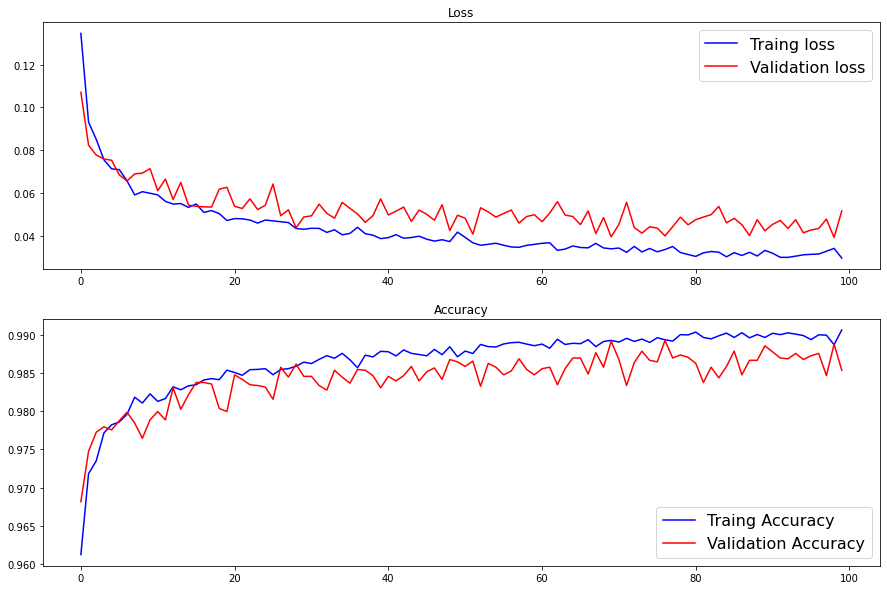

In [61]:
fig,axs = plt.subplots(2,1,figsize=(15,10))

axs[0].plot(history.history["loss"],color='b',label='Traing loss')
axs[0].plot(history.history["val_loss"],'r',label='Validation loss')
axs[0].legend(loc='best',prop={'size': 16})
axs[0].set_title("Loss")

axs[1].plot(history.history["accuracy"],color='b',label='Traing Accuracy')
axs[1].plot(history.history["val_accuracy"],'r',label='Validation Accuracy')
axs[1].legend(loc='best',prop={'size': 16})
axs[1].set_title("Accuracy")


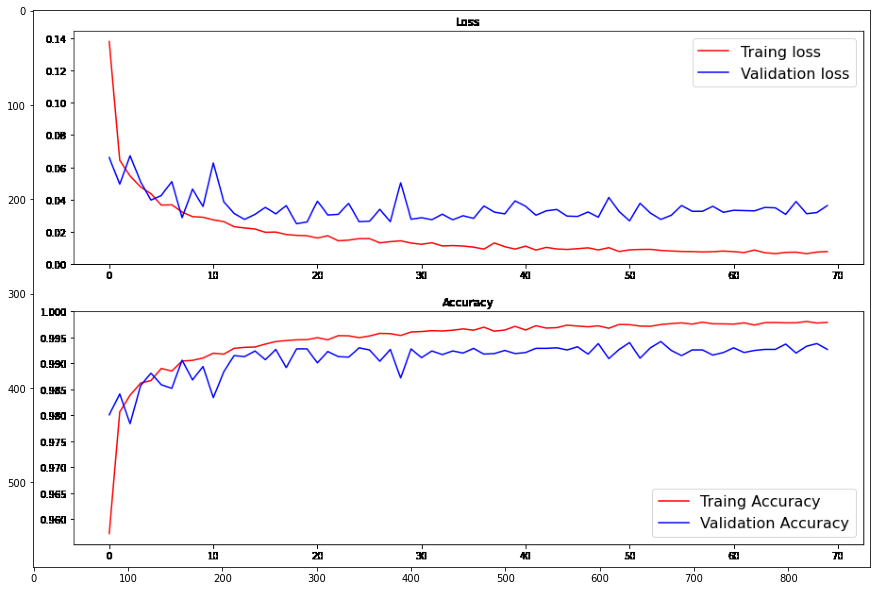

In [47]:
# hist_path =r'C:\Users\Jitpanu\Desktop\superai\OCR\E70 Aug Z,R.png'
# img =cv2.imread(hist_path)

# plt.figure(figsize=(15,20))
# plt.imshow(img)
# plt.show()

# Prediction

In [40]:
# predictions = model.predict(X_testr)

In [48]:
# predictions

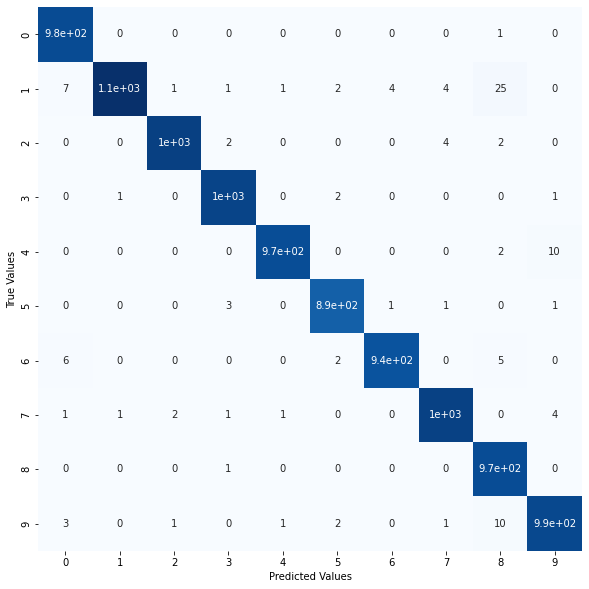

In [65]:
#test load model
load_predictions = reconstructed_model.predict(X_testr)
load_predictions = np.argmax(load_predictions,axis=1)

fig = plt.figure(figsize=(18, 10)) # Set Figure

con_matric = confusion_matrix(load_predictions, y_test) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(con_matric.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [66]:
load_predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [67]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [45]:
#Visualize uncorrect prediction

In [68]:
count=0
not_match=[]
for index,num in enumerate(y_test):
    if load_predictions[index] == num:
        count+=1
    else:
        not_match.append(index)
        
accuracy = count/len(y_test)
print(accuracy)

0.9882


In [69]:
len(not_match)

118

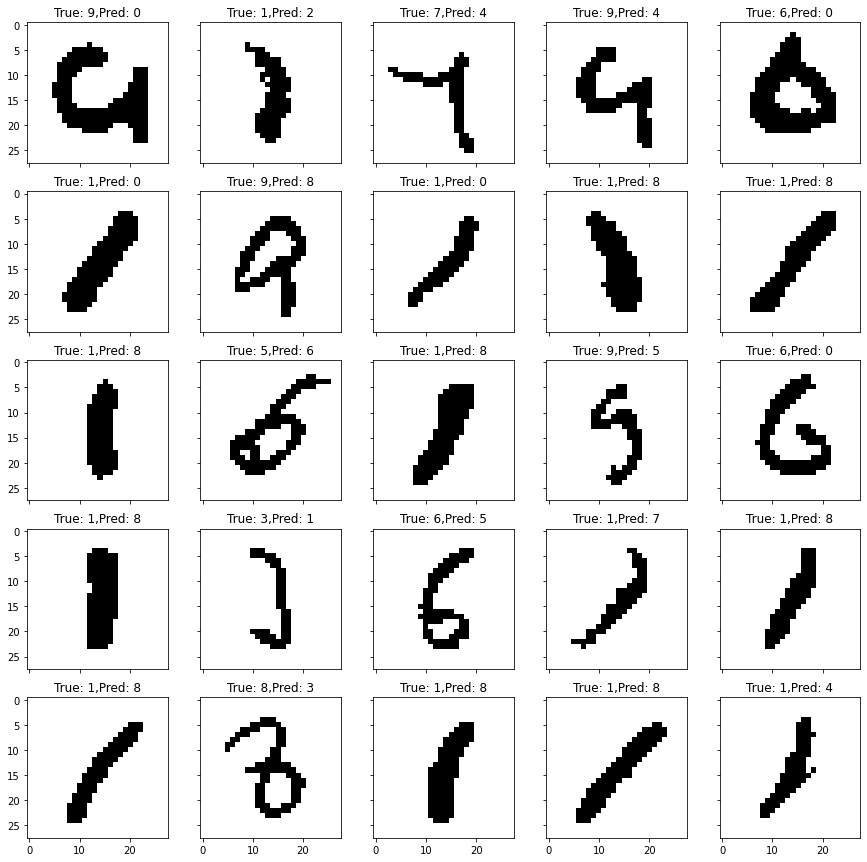

In [70]:
tmp_not_match = not_match.copy()
fig, axes = plt.subplots(5, 5,figsize=(15,15),sharex=True, sharey=True) #share mak it wider

for i in range(5):
    for j in range(5):
        index = random.choice(tmp_not_match)
        tmp_not_match.remove(index)
        axes[i,j].imshow(X_testr[index],cmap=plt.cm.binary)
        axes[i,j].set_title(f"True: {y_test[index]},Pred: {np.argmax(reconstructed_model.predict(np.expand_dims(X_testr[index],axis=0)))}")

tmp_not_match.clear()   

In [ ]:
#For individual

y_test:  5
Predict:  5


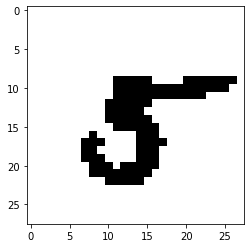

In [71]:
index =9998
predict_one = np.argmax(reconstructed_model.predict(np.expand_dims(X_testr[index],axis=0)))

plt.imshow(X_test[index],cmap=plt.cm.binary)
print("y_test: ",y_test[index])
print("Predict: ",predict_one)


In [72]:
test_loss,test_acc = reconstructed_model.evaluate(X_testr,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0525 - accuracy: 0.9882
0.05247141793370247
0.9882000088691711
